# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
print(combined_df.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [60]:
# Checking the number of mice.
print(f'There are {len(pd.unique(mouse_metadata["Mouse ID"]))} unique Mouse IDs.')


There are 249 unique Mouse IDs.


In [61]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
array = study_results.duplicated(subset=["Mouse ID", "Timepoint"])
duplicate_indices = [i for i, x in enumerate(array) if x]
print(duplicate_indices)
duplicates = study_results.iloc[duplicate_indices,:]
print(duplicates)
print(f'Unique Mouse ID(s): {pd.unique(duplicates["Mouse ID"])}')


[137, 360, 681, 869, 1111]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
137      g989          0           45.000000                 0
360      g989          5           47.570392                 0
681      g989         10           49.880528                 0
869      g989         15           53.442020                 0
1111     g989         20           54.657650                 1
Unique Mouse ID(s): ['g989']


In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_all_data = combined_df[combined_df["Mouse ID"] == "g989"]
duplicate_mouse_all_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [64]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_df["Mouse ID"]))

248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_df = clean_df.groupby("Drug Regimen").mean()
median_df = clean_df.groupby("Drug Regimen").median()
var_df = clean_df.groupby("Drug Regimen").var()
std_df = clean_df.groupby("Drug Regimen").std()
sem_df = clean_df.groupby("Drug Regimen").sem()

summary = {
    "Tumor Volume (mm3) Mean":mean_df["Tumor Volume (mm3)"],
    "Tumor Volume (mm3) Median":median_df["Tumor Volume (mm3)"],
    "Tumor Volume (mm3) Variance":var_df["Tumor Volume (mm3)"],
    "Tumor Volume (mm3) Standard Deviation":std_df["Tumor Volume (mm3)"],
    "Tumor Volume (mm3) SEM":sem_df["Tumor Volume (mm3)"]
}

summary_df = pd.DataFrame(summary)
summary_df



,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

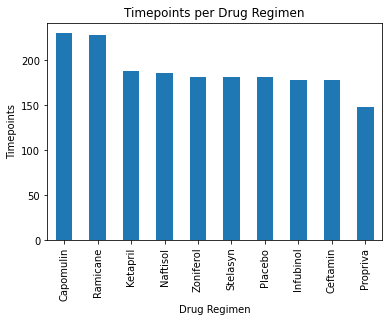

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_df = clean_df.groupby("Drug Regimen")['Timepoint'].count().sort_values(ascending=False)
ax = plot_df.plot(kind='bar')
ax.set_title("Timepoints per Drug Regimen")
ax.set_ylabel("Timepoints")
ax.plot()
plt.show()

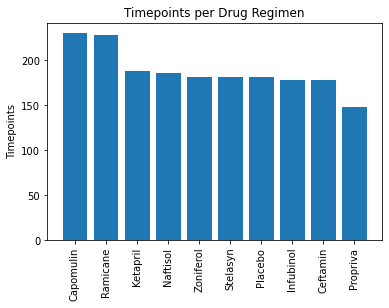

In [68]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = plot_df.index
y = plot_df.values

plt.bar(x, y)
plt.title("Timepoints per Drug Regimen")
plt.ylabel("Timepoints")
plt.xticks(rotation='vertical')
plt.plot()
plt.show()


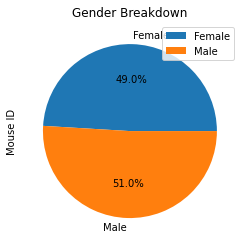

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pieplot_df = clean_df.groupby("Sex")["Mouse ID"].count()
pie = pieplot_df.plot(kind='pie', autopct="%1.1f%%")
pie.set_title("Gender Breakdown")
pie.legend()
pie.plot()
plt.show()

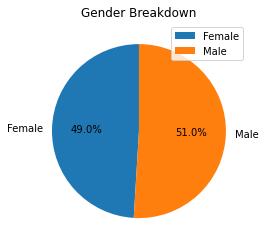

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = pieplot_df.index
counts = pieplot_df.values

plt.pie(counts, labels=genders, startangle=90, autopct="%1.1f%%")
plt.title("Gender Breakdown")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
max_times_df = clean_df.groupby("Mouse ID", as_index=False)["Timepoint"].max()
end_df = pd.merge(max_times_df, clean_df, on=["Mouse ID", "Timepoint"], how='left')
treatments = pd.unique(clean_df["Drug Regimen"])
treatments = [treatment for treatment in treatments]
nested_list = []

# creating list of treatment series with tumor data
for treatment in treatments:
    tumor_data = end_df.loc[end_df["Drug Regimen"] == treatment]
    quartiles = tumor_data["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + 1.5 * iqr
    high_outliers = tumor_data.loc[(tumor_data["Tumor Volume (mm3)"] > upperbound)]["Tumor Volume (mm3)"].tolist()
    low_outliers = tumor_data.loc[(tumor_data["Tumor Volume (mm3)"] < lowerbound)]["Tumor Volume (mm3)"].tolist()
    nested_list.append(tumor_data["Tumor Volume (mm3)"].tolist())
    print(f"{treatment}'s potential outliers: {low_outliers + high_outliers}")

Ramicane's potential outliers: []
Capomulin's potential outliers: []
Infubinol's potential outliers: [36.321345799999996]
Placebo's potential outliers: []
Ceftamin's potential outliers: []
Stelasyn's potential outliers: []
Zoniferol's potential outliers: []
Ketapril's potential outliers: []
Propriva's potential outliers: []
Naftisol's potential outliers: []


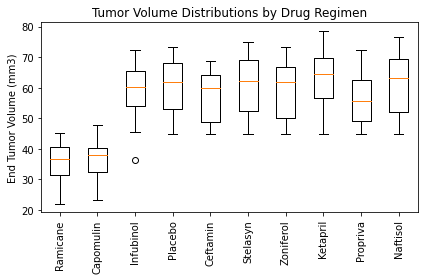

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(nested_list, labels=treatments)
plt.title("Tumor Volume Distributions by Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("End Tumor Volume (mm3)")
plt.tight_layout()
plt.show()


## Line and Scatter Plots

In [73]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_df = clean_df.loc[clean_df["Mouse ID"] == "b128"]
single_df = single_df.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
single_df.name = "Single Mouse Tumor Volume"

<Figure size 432x288 with 0 Axes>

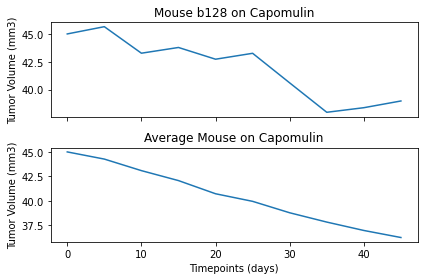

In [74]:
# or group by timepoint for all mouses treated with Capomulin (probably better)
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
avg_df = capomulin_df.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
avg_df.name = "Average Tumor Volume"

plt.clf()
fig, (single, average) = plt.subplots(2, sharex=True)

single.plot(single_df.index, single_df.values)
single.set_ylabel("Tumor Volume (mm3)")
single.set_title("Mouse b128 on Capomulin")

average.plot(avg_df.index, avg_df.values)
average.set_ylabel("Tumor Volume (mm3)")
average.set_xlabel("Timepoints (days)")
average.set_title("Average Mouse on Capomulin")

plt.tight_layout()
plt.show()

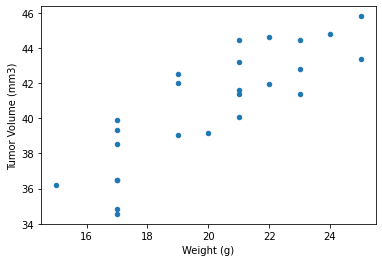

In [75]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = capomulin_df.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()
scatter_df.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')
plt.show()

## Correlation and Regression

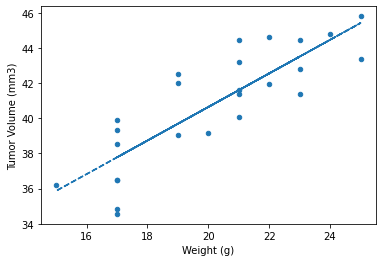

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy import stats

weight = scatter_df["Weight (g)"]
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(scatter_df["Weight (g)"], scatter_df["Tumor Volume (mm3)"])
m_fit = m_slope * weight + m_int

scatter_df = capomulin_df.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()
scatter_df.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')
plt.plot(weight, m_fit, "--")
plt.show()
